In [24]:
from keras.applications import VGG16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from sklearn.metrics import roc_auc_score
from keras.utils.np_utils import to_categorical

img_size = 224
batch_size = 10
number_of_test_images = 2167

base_model = VGG16(include_top=False, weights=None)
x = base_model.output
x = Dense(128)(x)
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.load_weights("dermatology_fine_tuned_model.h5")

data_generator = ImageDataGenerator(rescale=1./255)

test_generator = data_generator.flow_from_directory('test/',
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)
num_classes = len(test_generator.class_indices)
y_true = test_generator.classes  
#y_true = to_categorical(y_true, num_classes=num_classes)


model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

Found 2167 images belonging to 2 classes.


In [25]:
probs = model.predict_generator(test_generator)

preds = np.argmax(probs, axis=1)

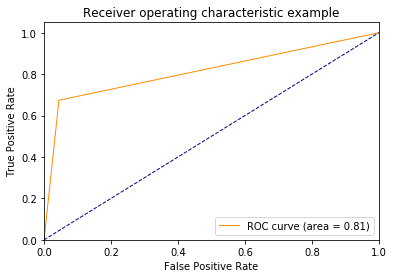

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_generator.classes, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
lw = 1
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[1851   86]
 [  75  155]]


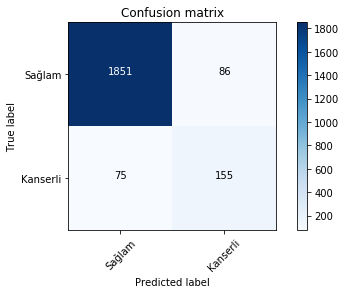

In [35]:
#http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
#Detailed information about confusion matrices

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
cm = confusion_matrix(test_generator.classes, preds)

#plot_confusion_matrix(cm, ['benign', 'malignant'], normalize=True)
plot_confusion_matrix(cm, ['Sağlam', 'Kanserli'], normalize=False)